# Calidad de un vino

Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difícil.  

Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués ”Vinho Verde”. Lamentablemente, se cuenta sólo con las características fisioquímicas asociadas a un vino en particular, los cuales corresponden a 11 atributos numéricos. 


##### http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

#### a. Carga de los dos dataset en un único dataframe de pandas.

Se cargan los datos en un dataframe pandas. Además, se agrega una columna indicando si el registro de vino corresponde a vino tinto o blanco. 

In [1]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)

In [2]:
print ("Vinos tintos poseen dimesión:",df_red.shape)
print ("Vinos blancos poseen dimensión:",df_white.shape)
print ("Así entonces, el total de registros Tinto-Blanco es de dimensión:", df.shape)

Vinos tintos poseen dimesión: (1599, 12)
Vinos blancos poseen dimensión: (4898, 12)
Así entonces, el total de registros Tinto-Blanco es de dimensión: (6497, 12)


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


En la celda anterior, haciendo uso de la función 'describe', se presenta un cuadro resumen en el que se indican ciertas estadísticas para los diferentes atributos de los datos (como 'max', 'min', 'mean', 'std', etc.) donde se aprecia que los atributos 'free sulfur dioxide' y 'total sulfur dioxide' presentan altos niveles de desviación estándar (17.749400 y 56.521855 respectivamente) lo que podría indicar la existencia de 'outliers'. 

In [4]:
print ("Los atributos existentes en el dataframe creado son:", df.columns)
print ("\nLa información resumen del dataframe indica:\n")
df.info()

Los atributos existentes en el dataframe creado son: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

La información resumen del dataframe indica:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(1

Los atributos con los que se dispone corresponden a los siguientes 12 (11 + variable target 'quality'): 

* fixed acidity           
* volatile acidity        
* citric acid             
* residual sugar          
* chlorides               
* free sulfur dioxide     
* total sulfur dioxide    
* density                 
* pH                      
* sulphates               
* alcohol                 
* quality (Target: score between 0 and 10)               

Así entonces, a partir de info(), es posible distinguir el tipo de datos de cada uno de los atrbutos en cuestión además de comprobar que no existen registros nulos dentro del dataframe. 

In [5]:
tipo =[]
for i in range(df.shape[0]):
    if i<= df_red.shape[0]:
        tipo.append('red')
    else:
        tipo.append('white')
#append 1 si es rojo, 2 si es blanco

In [6]:
df['type']=pd.DataFrame(tipo)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [8]:
df= df.sample(frac=1, replace=True)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4064,5.5,0.28,0.21,1.6,0.032,23.0,85.0,0.99027,3.42,0.42,12.5,5,white
2979,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7,white
1615,7.5,0.19,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,6,white
4222,6.1,0.38,0.14,3.9,0.060,27.0,113.0,0.99344,3.07,0.34,9.2,4,white
643,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5,red


Se agrega entonces una nueva columna al dataframe:

* type                    

Este atributo indica el tipo de vino en cuestión, el cual puede ser 'red' o 'white'.

#### b. Estimación de la calidad de un vino: clasificación binaria.

Para predecir si un vino es de buena calidad o no, se utilizarán las distintas características fisioquímicas presentes en los datos para estimar dicha etiqueta. 

Para esto se crean las matrices de entrenamiento y de pruebas, además de la etiqueta 'good_quality' para ambos conjuntos en la que se informa 1 si la calidad es buena (quality mayor a 5) o 0 en caso contrario. 


In [10]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good_quality
4064,5.5,0.28,0.21,1.6,0.032,23.0,85.0,0.99027,3.42,0.42,12.5,5,white,0
2979,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7,white,1
1615,7.5,0.19,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,6,white,1
4222,6.1,0.38,0.14,3.9,0.060,27.0,113.0,0.99344,3.07,0.34,9.2,4,white,0
643,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5,red,0


En vista de que sa ha crado una nueva característica para indicar si el vino en cuestión se trata o no de un vino de buena calidad ('good_quality'), se procede a eliminar el atributo 'quality'

In [11]:
df = df.drop('quality',axis=1)

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,good_quality
4064,5.5,0.28,0.21,1.6,0.032,23.0,85.0,0.99027,3.42,0.42,12.5,white,0
2979,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,white,1
1615,7.5,0.19,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,white,1
4222,6.1,0.38,0.14,3.9,0.060,27.0,113.0,0.99344,3.07,0.34,9.2,white,0
643,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,red,0


In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'good_quality'],
      dtype='object')

A continuación es necesario definir los conjuntos de datos sobre los que se trabajará a fin de entrenar los diversos modelos de clasificación, validarlos y a su vez, medir su desempeño final sobre el conjunto de testeo (25% de los registros en este caso)

In [15]:
import math
ntrain = math.floor(df.shape[0]*0.75)
#nval = math.floor(df.shape[0]*0.75)
Xdf=df.ix[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']]
Ydf=df.ix[:,'good_quality']

In [16]:
n_test= df.shape[0]-(ntrain)
print ("El corte para el conjunto de entrenamiento quedará en index:", ntrain)
#print ("El corte para el conjunto de validación quedará en index:", nval)
print ("El resto de los datos (25%) corresponderá al conjunto de testing que son", n_test,"registros")

El corte para el conjunto de entrenamiento quedará en index: 4872
El resto de los datos (25%) corresponderá al conjunto de testing que son 1625 registros


In [17]:
X_train = Xdf[0:ntrain].values
#X_val = Xdf[ntrain:nval].values
X_test = Xdf[ntrain:].values
Y_train = Ydf[0:ntrain].values
#Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[ntrain:].values


In [18]:
print ("Así entonces, las dimensiones de los diferentes conjuntos de datos son:")
print ("Training set:",X_train.shape)
#print ("Validation set:",X_val.shape)
print ("Testing set:",X_test.shape)

Así entonces, las dimensiones de los diferentes conjuntos de datos son:
Training set: (4872, 12)
Testing set: (1625, 12)


Cabe destacar que el conjunto de pruebas (correspondiente al 25%) será utilizado particularmente en esta actividad para verificar la calidad de los algoritmos a entrenar. Es decir, cualquier validación de dichos modelos se realizará sobre el conjunto de testing (**df[4872] hasta df[6496]**)

Cabe destacar que, con el objetivo de no afectar los futuros resultados, se ha remuestreado el dataframe mediante la función 'sample' a fin de no sesgar los conjuntos de entrenamiento y testeo hacia un tipo específico de vino.


#### (c) Entrenar árbol de clasificación de múltiples niveles para resolver el problema. 

Se propone variar los hiper-parámetros de 'max_depth', 'min_samples_leaf' y 'criterion' a fin de obtener aquel  árbol de mejor desempeño frente a los datos de validación.





In [19]:
Xdf=df.ix[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']]
Xdf=pd.get_dummies(Xdf, columns=['type'])
#Xdf['type']= pd.to_numeric(Xdf['type'])
Xdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
4064,5.5,0.280,0.21,1.60,0.032,23.0,85.0,0.99027,3.42,0.42,12.500000,0,1
2979,6.7,0.360,0.26,7.90,0.034,39.0,123.0,0.99119,2.99,0.30,12.200000,0,1
1615,7.5,0.190,0.49,1.60,0.047,42.0,140.0,0.99320,3.40,0.47,10.700000,0,1
4222,6.1,0.380,0.14,3.90,0.060,27.0,113.0,0.99344,3.07,0.34,9.200000,0,1
643,9.5,0.590,0.44,2.30,0.071,21.0,68.0,0.99920,3.46,0.63,9.500000,1,0
1162,6.6,0.250,0.41,7.40,0.043,29.0,151.0,0.99460,3.15,0.60,10.200000,1,0
290,7.2,0.230,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.000000,1,0
2923,6.9,0.220,0.31,6.30,0.029,41.0,131.0,0.99326,3.08,0.49,10.800000,0,1
121,8.8,0.550,0.04,2.20,0.119,14.0,56.0,0.99620,3.21,0.60,10.900000,1,0
2989,6.2,0.160,0.32,1.10,0.036,74.0,184.0,0.99096,3.22,0.41,11.000000,0,1


In [20]:
Xdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white'],
      dtype='object')

In [21]:
Ydf=df.ix[:,'good_quality']
X_train = Xdf[0:ntrain].values
#X_val = Xdf[ntrain:nval].values
X_test = Xdf[ntrain:].values
Y_train = Ydf[0:ntrain].values
#Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[ntrain:].values

In [22]:
X_train.shape

(4872, 13)

En la siguiente celda se define entonces un iterador sobre los diferentes posibles modelos a fin de obtener el de mejor desempeño

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

best_f=0
criterios= ['gini','entropy']
min_leaf=[30,50,70]
for crit in criterios:
    for min_l in min_leaf:
        for n in range(2,20):
            AC = DecisionTreeClassifier(random_state=0, min_samples_leaf=min_l,criterion=crit, max_depth=n)
            AC.fit(X_train,Y_train)
            Y_pred_test = AC.predict(X_test)
            f1s= f1_score(Y_test, Y_pred_test) 
            #print (f1s)
            if f1s>best_f:
                best_f = f1s
                print ("Configuración bajo criterio",crit,"min_samples_leaf",min_l,"max_depth",n)
                print ("F1-score=%f"%f1s)


Configuración bajo criterio gini min_samples_leaf 30 max_depth 2
F1-score=0.787164
Configuración bajo criterio gini min_samples_leaf 30 max_depth 4
F1-score=0.801874
Configuración bajo criterio gini min_samples_leaf 30 max_depth 5
F1-score=0.821828
Configuración bajo criterio gini min_samples_leaf 70 max_depth 5
F1-score=0.823049
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 7
F1-score=0.823262
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 9
F1-score=0.825967
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 11
F1-score=0.832333


Se propone además, a fin de comparar el desempeño de las diferentes máquinas a entrenar, la aplicación de Log() a aquellos atributos que, como ya se ha mencionado, presentar una alta desviación estándar. Estos son: 'free sulfur dioxide' y 'free sulfur dioxide'.

In [24]:
import numpy as np
Xdf['free sulfur dioxide']= np.log(df['free sulfur dioxide'])
Xdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
4064,5.5,0.280,0.21,1.60,0.032,3.135494,85.0,0.99027,3.42,0.42,12.500000,0,1
2979,6.7,0.360,0.26,7.90,0.034,3.663562,123.0,0.99119,2.99,0.30,12.200000,0,1
1615,7.5,0.190,0.49,1.60,0.047,3.737670,140.0,0.99320,3.40,0.47,10.700000,0,1
4222,6.1,0.380,0.14,3.90,0.060,3.295837,113.0,0.99344,3.07,0.34,9.200000,0,1
643,9.5,0.590,0.44,2.30,0.071,3.044522,68.0,0.99920,3.46,0.63,9.500000,1,0
1162,6.6,0.250,0.41,7.40,0.043,3.367296,151.0,0.99460,3.15,0.60,10.200000,1,0
290,7.2,0.230,0.39,14.20,0.058,3.891820,192.0,0.99790,2.98,0.48,9.000000,1,0
2923,6.9,0.220,0.31,6.30,0.029,3.713572,131.0,0.99326,3.08,0.49,10.800000,0,1
121,8.8,0.550,0.04,2.20,0.119,2.639057,56.0,0.99620,3.21,0.60,10.900000,1,0
2989,6.2,0.160,0.32,1.10,0.036,4.304065,184.0,0.99096,3.22,0.41,11.000000,0,1


In [25]:
Xdf['total sulfur dioxide']= np.log(df['total sulfur dioxide'])
Xdf.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215284,0.341976,0.318898,5.471056,0.056675,3.221103,4.569170,0.994692,3.219123,0.531790,10.501946,0.488225,0.511775
std,1.290511,0.169531,0.145560,4.783585,0.039487,0.700997,0.712979,0.003028,0.159334,0.149918,1.192098,0.499900,0.499900
min,3.800000,0.080000,0.000000,0.600000,0.009000,0.000000,1.791759,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,2.833213,4.369448,0.992350,3.110000,0.430000,9.500000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,3.367296,4.770685,0.994900,3.200000,0.510000,10.300000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,3.737670,5.049856,0.996960,3.320000,0.600000,11.300000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,4.987025,5.840642,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


In [26]:
Xdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white'],
      dtype='object')

In [27]:
Ydf=df.ix[:,'good_quality']
X_train = Xdf[0:ntrain].values
#X_val = Xdf[ntrain:nval].values
X_test = Xdf[ntrain:].values
Y_train = Ydf[0:ntrain].values
#Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[ntrain:].values

In [28]:
best_f=0
criterios= ['gini','entropy']
min_leaf=[30,50,70]
for crit in criterios:
    for min_l in min_leaf:
        for n in range(2,20):
            AC = DecisionTreeClassifier(random_state=0, min_samples_leaf=min_l,criterion=crit, max_depth=n)
            AC.fit(X_train,Y_train)
            Y_pred_test = AC.predict(X_test)
            f1s= f1_score(Y_test, Y_pred_test) 
            #print (f1s)
            if f1s>best_f:
                best_f = f1s
                print ("Configuración bajo criterio",crit,"min_samples_leaf",min_l,"max_depth",n)
                print ("F1-score=%f"%f1s)


Configuración bajo criterio gini min_samples_leaf 30 max_depth 2
F1-score=0.787164
Configuración bajo criterio gini min_samples_leaf 30 max_depth 4
F1-score=0.801874
Configuración bajo criterio gini min_samples_leaf 30 max_depth 5
F1-score=0.821828
Configuración bajo criterio gini min_samples_leaf 70 max_depth 5
F1-score=0.823049
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 7
F1-score=0.823262
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 9
F1-score=0.825967
Configuración bajo criterio entropy min_samples_leaf 30 max_depth 11
F1-score=0.832333


Se aprecia que los árboles de clasificación, al ser robustos frente a 'outliers' dado el mecanismo de partición que éstos aplican, no se ven beneficiados (ni mucho menos perjudicados) del cambio en las columnas 'free sulfur dioxide' y 'free sulfur dioxide'.  
**Qué es en sí la medida F1-score? **
Dado que las clases positiva y negativa se encuentran desbalanceadas ( de buena calidad vs de mala calidad), es recomendable aplicar esta métrica para evaluar el desempeño del clasificador.  
El F1-score se puede interpretar como el promedio ponderado de la precisión y recall, alcanzando su máximo valor en 1 y el peor en 0. Ésta se obtiene de la siguiente manera:  

\begin{equation}
F1 = \frac{2 * P * R}{P + R } , 
\end{equation}
donde P indica precisión y R recall.  

Así entonces, la mejor relación de P y R se mantiene en un 83.2333%.

#### (d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. 

Variando la cantidad de árboles de decisión utilizados en el ensamblador, es decir, 'n estimators', se analiza el desempeño de éste según el propósito de la actividad, predecir la calidad del vino en cuestión. 

In [50]:
from sklearn.ensemble import RandomForestClassifier

trains=[]
tests=[]
f1_train= 0
f1_test= 0
for est in range(2,40):
    #print (m)
    modelRFR = RandomForestClassifier(n_estimators=est, max_depth=15, random_state=0, n_jobs=-1)
    modelRFR.fit(X_train, Y_train)
    y_pred_train=modelRFR.predict(X_train)
    y_pred_test=modelRFR.predict(X_test)
    aux_train= f1_score(Y_train, y_pred_train)
    aux_test= f1_score(Y_test, y_pred_test) 
    if aux_test>f1_test:
        f1_test = aux_test
        print ("Configuración bajo n-estimators",est, "alcanza nuevo mejor desempeño")
        print ("F1-score=%f"%aux_test)
    trains.append(aux_train)
    tests.append(aux_test)

Configuración bajo n-estimators 2 alcanza nuevo mejor desempeño
F1-score=0.853002
Configuración bajo n-estimators 3 alcanza nuevo mejor desempeño
F1-score=0.884190
Configuración bajo n-estimators 5 alcanza nuevo mejor desempeño
F1-score=0.891429
Configuración bajo n-estimators 6 alcanza nuevo mejor desempeño
F1-score=0.901163
Configuración bajo n-estimators 7 alcanza nuevo mejor desempeño
F1-score=0.901569
Configuración bajo n-estimators 8 alcanza nuevo mejor desempeño
F1-score=0.906820
Configuración bajo n-estimators 10 alcanza nuevo mejor desempeño
F1-score=0.910569
Configuración bajo n-estimators 11 alcanza nuevo mejor desempeño
F1-score=0.910900
Configuración bajo n-estimators 12 alcanza nuevo mejor desempeño
F1-score=0.912649
Configuración bajo n-estimators 15 alcanza nuevo mejor desempeño
F1-score=0.914177
Configuración bajo n-estimators 16 alcanza nuevo mejor desempeño
F1-score=0.916706
Configuración bajo n-estimators 19 alcanza nuevo mejor desempeño
F1-score=0.920000
Configurac

Dado que, para efectos de este problema en particular, se solicita evaluar el desempeño de la máquina directamente sobre el conjunto de testing, es natural tomar aquella configuración de n-estimators= 38 y max_deth=15 puesto que se logra F1-score del 92.2275%

El comportamiento, el términos de la métrica F1-score, en los diferentes número de estimadores se presenta a continunación:

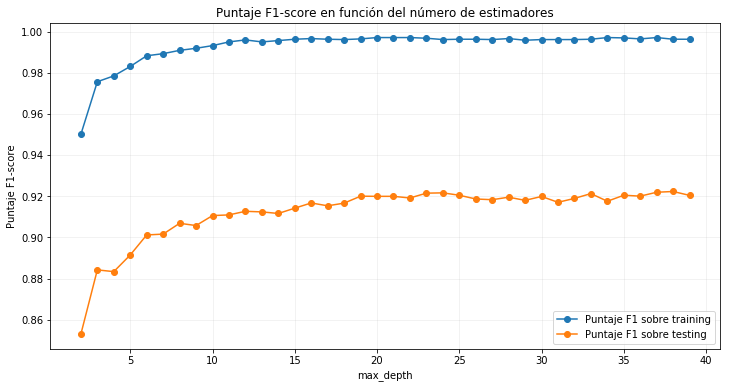

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid(alpha=0.2)
plt.plot(range(2,40), trains, marker='o', label='Puntaje F1 sobre training')
plt.plot(range(2,40), tests, marker='o', label='Puntaje F1 sobre testing')
plt.legend()
plt.title('Puntaje F1-score en función del número de estimadores')
plt.xlabel('max_depth')
plt.ylabel('Puntaje F1-score')
plt.show()

Agregando más hiper-parámetros a variar en la ejecución de Random Forest:

* Criterion
* min_samples_leaf

In [59]:
trains=[]
tests=[]
min_test=1
f1_train= 0
f1_test= 0
criterios= ['gini','entropy']
min_leaf=[30,25,20,15,10,5]
for min_l in min_leaf:
    for crit in criterios:
        for m in range(2,40):
            modelRFR = RandomForestClassifier(n_estimators=m, criterion=crit, min_samples_leaf=min_l, max_depth=15,n_jobs=-1)
            modelRFR.fit(X_train, Y_train)
            y_pred_train=modelRFR.predict(X_train)
            y_pred_test=modelRFR.predict(X_test)
            aux_train= f1_score(Y_train, y_pred_train)
            aux_test= f1_score(Y_test, y_pred_test) 
            if aux_test>f1_test:
                f1_test = aux_test
                print ("Configuración bajo n-estimators",m,"criterio",crit,"y min_sample_leaf",min_l, "alcanza nuevo mejor desempeño")
                print ("F1-score=%f"%aux_test)
            trains.append(aux_train)
            tests.append(aux_test)

Configuración bajo n-estimators 2 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.822293
Configuración bajo n-estimators 3 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.828996
Configuración bajo n-estimators 5 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.832258
Configuración bajo n-estimators 7 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.839393
Configuración bajo n-estimators 10 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.842153
Configuración bajo n-estimators 12 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.846295
Configuración bajo n-estimators 25 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.848540
Configuración bajo n-estimators 39 criterio gini y min_sample_leaf 30 alcanza nuevo mejor desempeño
F1-score=0.848763
Configuración bajo n-estimators 13 criterio entropy y min_sa

A pesar de agregar mayor número de hiper-párametros, no se logra sobrepasar al modelo ya establecido anteriormente (n_estimators=38 y max_depth=15). Esto se explica debido a que, como ya se ha mencionado, se busca ajustar al máximo nuestro modelo. Dado esto, se prueban nuevos valores para 'max_sample_leaf' a fin de determinar el impacto de ésto sobre el conjunto de testeo.

##### Analizando el efecto se 'min_samples_leaf' 

In [60]:
trains=[]
tests=[]
min_test=1
f1_train= 0
f1_test= 0
min_leaf=[1,2,3,4,5,6,7,8,9,10,11,12]
for min_l in min_leaf:
    modelRFR = RandomForestClassifier(n_estimators=38, criterion='gini', min_samples_leaf=min_l, max_depth=15,n_jobs=-1)
    modelRFR.fit(X_train, Y_train)
    y_pred_train=modelRFR.predict(X_train)
    y_pred_test=modelRFR.predict(X_test)
    aux_train= f1_score(Y_train, y_pred_train)
    aux_test= f1_score(Y_test, y_pred_test) 
    if aux_test>f1_test:
        f1_test = aux_test
        print ("Configuración bajo min_sample_leaf",min_l, "alcanza nuevo mejor desempeño")
        print ("F1-score=%f"%aux_test)
    trains.append(aux_train)
    tests.append(aux_test)

Configuración bajo min_sample_leaf 1 alcanza nuevo mejor desempeño
F1-score=0.920590


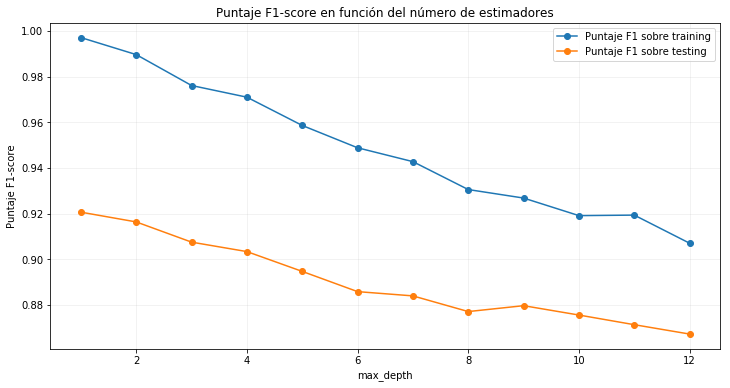

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid(alpha=0.2)
plt.plot(range(1,13), trains, marker='o', label='Puntaje F1 sobre training')
plt.plot(range(1,13), tests, marker='o', label='Puntaje F1 sobre testing')
plt.legend()
plt.title('Puntaje F1-score en función del número de estimadores')
plt.xlabel('max_depth')
plt.ylabel('Puntaje F1-score')
plt.show()

Agragando nuevos hiper-parámetros a variar, es posible notar mejoras cuando se configura Random Forest con un nivel bajo para mínima cantidad de registros en las hojas de los árboles. Sin embargo, a menudo esto se traduce en un mayor sobreajuste del modelo hacia los datos de entrenamiento.  
Aún así, el comportamiento observado, tanto en el conjunto de entrenamiento como en el conjunto de testeo es muy similar pudiendo afiermar que, para este caso en particular, no se está en presencia de overfitting. En lugar de ello, a medida que F1-score aplicado al conjunto de datos de entrenamiento aumenta, se logra mejor F1-score sobre el conjunto de datos de testing. 


#### (e) Entrenar un ensamblador de árboles de múltiples niveles mediante la técnica de AdaBoost. 

Variando la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), se propone analizar en desempeño que éste obtiene en las diferentes configuraciones. 

In [65]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_train =[]
adaboost_test=[]
best_ada_test = 0
for i in range(2,40):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15,random_state=0), n_estimators=i, random_state=0)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    F1_train = f1_score(Y_pred_train,Y_train)
    F1_test = f1_score(Y_pred_test,Y_test)
    adaboost_train.append(F1_train)
    adaboost_test.append(F1_test)
    if F1_test>best_ada_test:
        best_ada_test=F1_test
        print ("Nuevo mejor desempeño bajo AdaBoost con n_estimators:",i)
        print (F1_test)


Nuevo mejor desempeño bajo AdaBoost con n_estimators: 2
0.905585763717
Nuevo mejor desempeño bajo AdaBoost con n_estimators: 3
0.915986557849
Nuevo mejor desempeño bajo AdaBoost con n_estimators: 4
0.916265640038
Nuevo mejor desempeño bajo AdaBoost con n_estimators: 7
0.923954372624
Nuevo mejor desempeño bajo AdaBoost con n_estimators: 8
0.926829268293
Nuevo mejor desempeño bajo AdaBoost con n_estimators: 12
0.927992370052


La implementacioń de AdaBoost en este caso particular logra un mejor desempeño sobre el conjunto de datos de testing respecto a Random Forest. Este útlimo logró nivel para F1-score del 92.0590% mientras que AdaBoost 92.799%.  
Esta diferencia radica en que AdaBoost corresponde a un método iterativo que busca reajutar el modelo ya establecido en la etapa inmediatamente anterior. No así, Random Forest que se basa en el ensamblado de árboles para lograr una mejor predicción.  
Aún así, cabe destacar que AdaBoost requiere de mucho más tiempo de ejecución que Random Forest por lo que se debe determinar muy bien a la hora de fijar un método de ensamblado. Priorizar tiempo o priorizar desempeño.   

A continuación se presenta el nivel de F1-core obtenido por AdaBoost para los diferentes niveles de 'n_estimators'

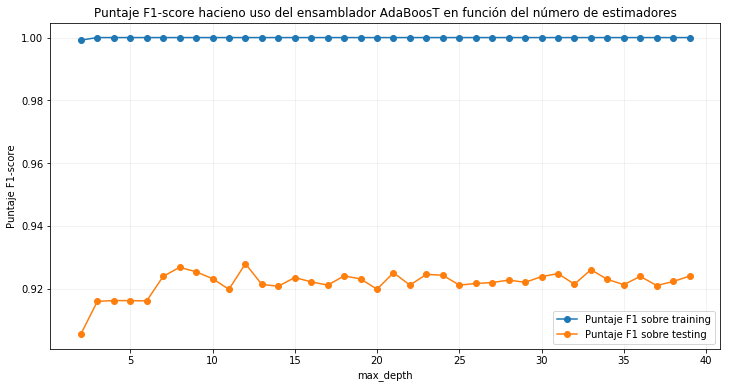

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid(alpha=0.2)
plt.plot(range(2,40), adaboost_train, marker='o', label='Puntaje F1 sobre training')
plt.plot(range(2,40), adaboost_test, marker='o', label='Puntaje F1 sobre testing')
plt.legend()
plt.title('Puntaje F1-score hacieno uso del ensamblador AdaBoosT en función del número de estimadores')
plt.xlabel('max_depth')
plt.ylabel('Puntaje F1-score')
plt.show()

#### (f) Entrene alguna otra máquina de aprendizaje para resolver este problema. 

Eligiendo nuevamente variar los 'n_estimators' del modelo a proponer, se busca analizar el comportamiento del ensamblador Bagging.

In [69]:
from sklearn.ensemble import BaggingClassifier
bagg_train =[]
bagg_test=[]
best_bagg_test = 0
for i in range(2,40):
    model = BaggingClassifier(DecisionTreeClassifier(max_depth=15,random_state=0), n_estimators=i, random_state=0)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    F1_train = f1_score(Y_pred_train,Y_train)
    F1_test = f1_score(Y_pred_test,Y_test)
    bagg_train.append(F1_train)
    bagg_test.append(F1_test)
    if F1_test>best_bagg_test:
        best_bagg_test=F1_test
        print ("Nuevo mejor desempeño bajo Bagging con n_estimators:",i)
        print (F1_test)

Nuevo mejor desempeño bajo Bagging con n_estimators: 2
0.854081632653
Nuevo mejor desempeño bajo Bagging con n_estimators: 3
0.89143950263
Nuevo mejor desempeño bajo Bagging con n_estimators: 5
0.896060749881
Nuevo mejor desempeño bajo Bagging con n_estimators: 6
0.900533721494
Nuevo mejor desempeño bajo Bagging con n_estimators: 7
0.908658420552
Nuevo mejor desempeño bajo Bagging con n_estimators: 12
0.909792571153
Nuevo mejor desempeño bajo Bagging con n_estimators: 21
0.912314326785
Nuevo mejor desempeño bajo Bagging con n_estimators: 26
0.913461538462
Nuevo mejor desempeño bajo Bagging con n_estimators: 37
0.913875598086
Nuevo mejor desempeño bajo Bagging con n_estimators: 39
0.914832535885


La implementacioń de Bagging en este caso particular, no logra un mejor desempeño sobre el conjunto de datos de testing respecto a AdaBoost (91.483% vs 92.799%). Sin embargo, este modelo de ensamblado requirió menor tiempo de ejecución que AdaBoost por lo que nuevamente se debe determinar muy bien a la hora de fijar un método de ensamblado qué se busca maximizar. Es decir, priorizar tiempo o priorizar el desempeño del modelo.

A continuación se presenta el nivel de F1-core obtenido por Bagging para los diferentes niveles de 'n_estimators'


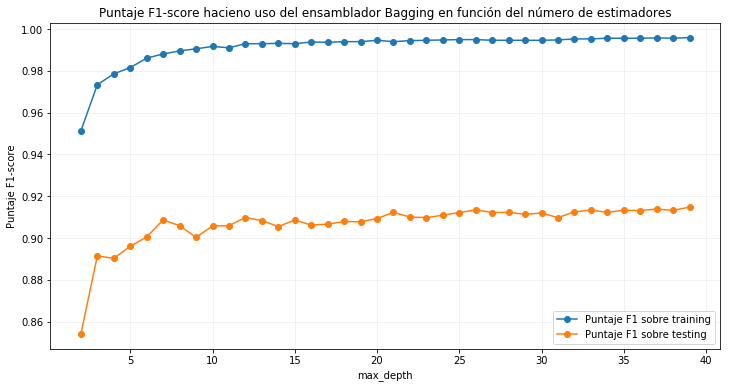

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid(alpha=0.2)
plt.plot(range(2,40), bagg_train, marker='o', label='Puntaje F1 sobre training')
plt.plot(range(2,40), bagg_test, marker='o', label='Puntaje F1 sobre testing')
plt.legend()
plt.title('Puntaje F1-score hacieno uso del ensamblador Bagging en función del número de estimadores')
plt.xlabel('max_depth')
plt.ylabel('Puntaje F1-score')
plt.show()

#### (g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest

Se propone entonces, seguir el enfoque utilizado en la tarea 1, FSS